# SUPPORT VECTOR MACHINE IMPLEMETATION 


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [5]:
# Generate classification dataset
x, y = make_classification(
    n_samples=5000, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=2, 
    n_redundant=0, 
    random_state=42
)


In [6]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# Convert to DataFrame for plotting
df = pd.DataFrame(x_scaled, columns=['Feature1', 'Feature2'])
df['Class'] = y

Text(0, 0.5, 'Feature 2')

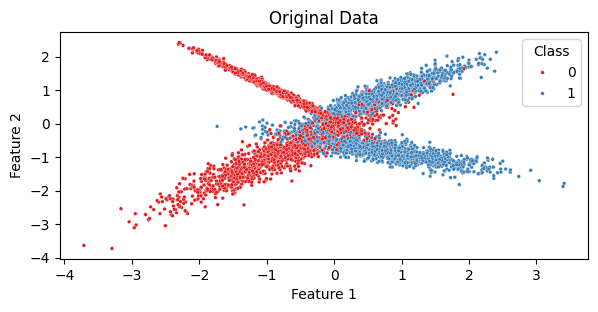

In [8]:
# Plot original data
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['Class'], s=7, palette='Set1')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [9]:
# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

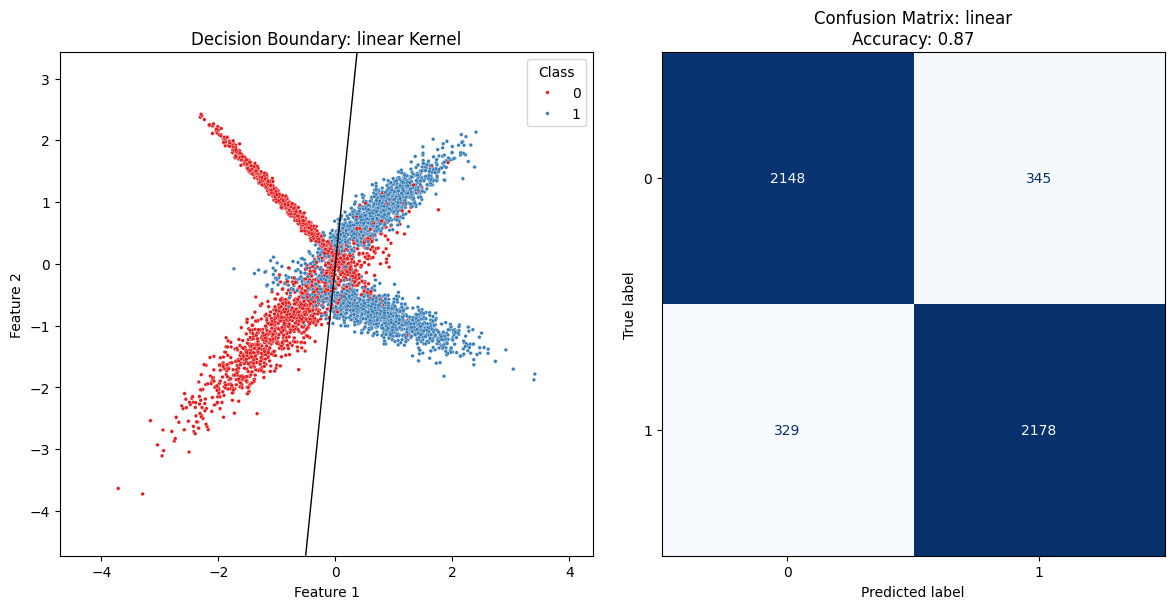

Kernel: linear
Confusion Matrix:
[[2148  345]
 [ 329 2178]]
Accuracy: 0.87



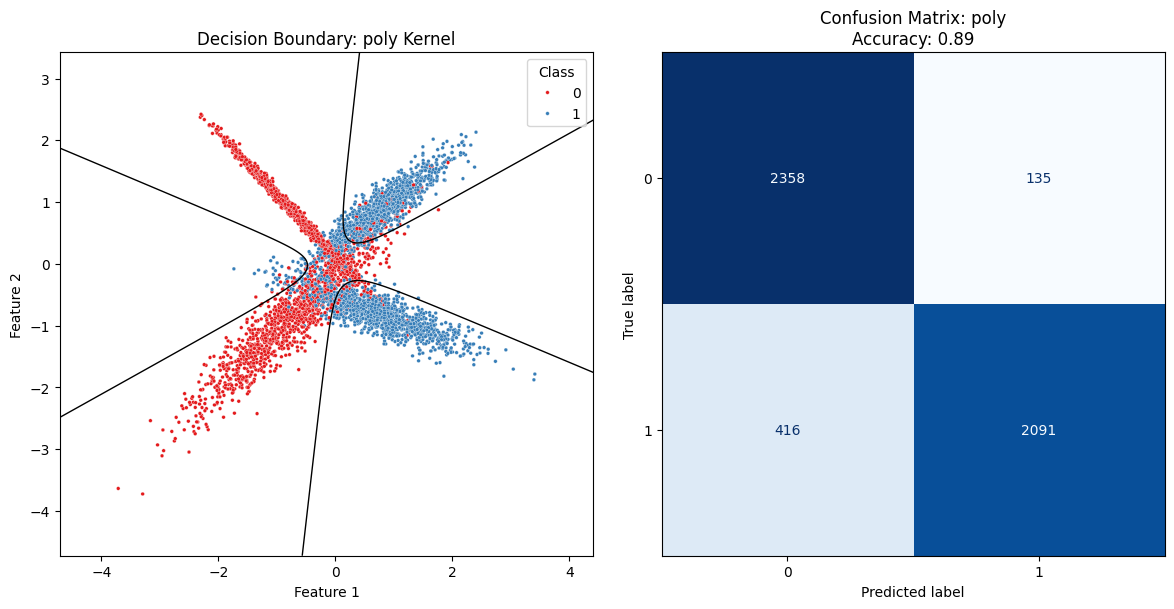

Kernel: poly
Confusion Matrix:
[[2358  135]
 [ 416 2091]]
Accuracy: 0.89



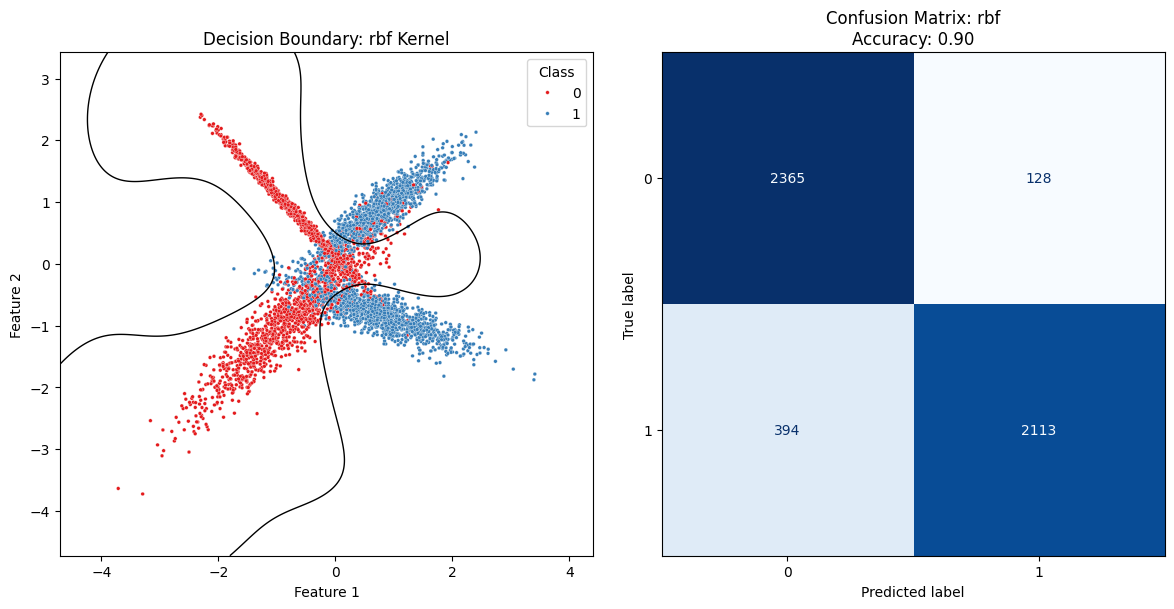

Kernel: rbf
Confusion Matrix:
[[2365  128]
 [ 394 2113]]
Accuracy: 0.90



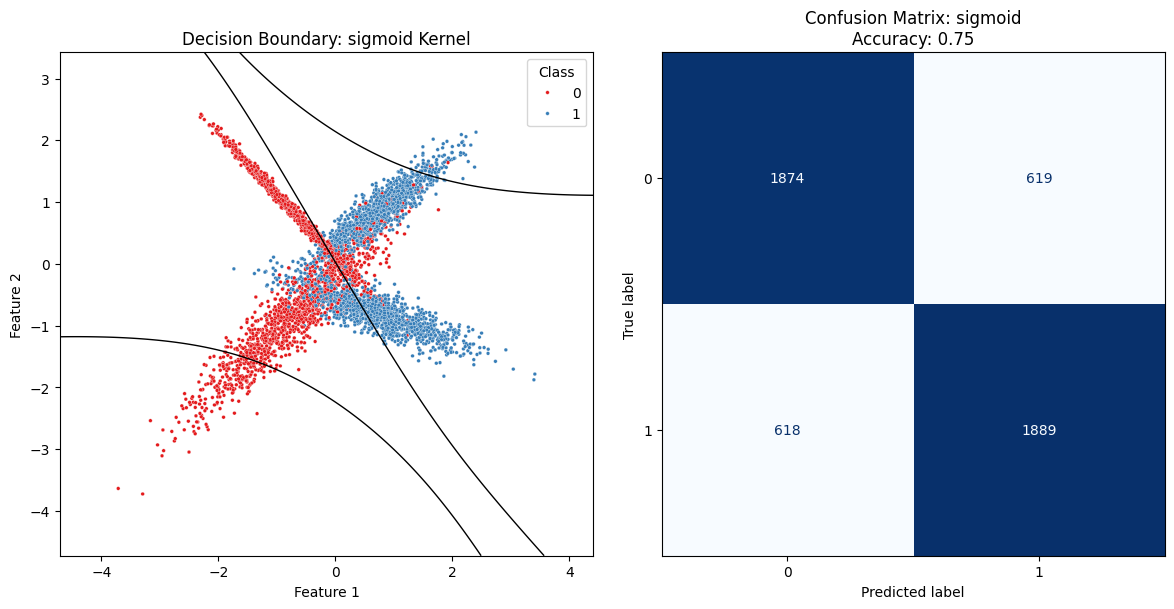

Kernel: sigmoid
Confusion Matrix:
[[1874  619]
 [ 618 1889]]
Accuracy: 0.75



In [11]:
#Apply SVC with each kernel and plot separately
for kernel in kernels:
    svc = SVC(kernel=kernel, gamma='auto')
    svc.fit(x_scaled, y)
    
    # Decision boundary grid
    xx, yy = np.meshgrid(
        np.linspace(df['Feature1'].min() - 1, df['Feature1'].max() + 1, 500),
        np.linspace(df['Feature2'].min() - 1, df['Feature2'].max() + 1, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = svc.decision_function(grid)
    zz = zz.reshape(xx.shape)

    # Predictions and metrics
    y_pred = svc.predict(x_scaled)
    cm = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)

    # Create plots
    plt.figure(figsize=(12, 6))
    
    # Plot decision boundary
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['Class'], s=7, palette='Set1')
    plt.contour(xx, yy, zz, levels=[0], colors='k', linewidths=1)
    plt.title(f"Decision Boundary: {kernel} Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    # Plot confusion matrix
    plt.subplot(1, 2, 2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
    disp.plot(ax=plt.gca(), cmap='Blues', colorbar=False)
    plt.title(f"Confusion Matrix: {kernel}\nAccuracy: {acc:.2f}")
    
    # Display the plot for the current kernel
    plt.tight_layout()
    plt.show()

    # Print accuracy and confusion matrix
    print(f"Kernel: {kernel}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.2f}\n")

# Hyperparametere Tuning With SVC

In [12]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [14]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [15]:
grid.fit(x_scaled,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.890 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.868 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [17]:
from sklearn.metrics import classification_report

In [18]:
## Prediction
y_pred=grid.predict(x_scaled)
print(classification_report(y,y_pred))
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2493
           1       0.94      0.90      0.92      2507

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

[[2342  151]
 [ 255 2252]]
0.9188
